In [1]:
# get libraries
library(dplyr)
library(MASS)
library(caret)
library(e1071)
library(class)
library(car)
library(ROCR)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'MASS' was built under R version 3.6.3"
Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Warning message:
"package 'ROCR' was built under R version 3.6.3"

In [2]:
# read data
data = read.csv("prlmis-data-full.csv", header=TRUE, fileEncoding="UTF-8-BOM")

# remove alternate response variables
data = data[,!names(data) %in% c("PRLANY","PRLMISAB")]

# update categorical values from raw dataset to be descriptive
data$YEAR <- replace(data$YEAR, data$YEAR=="15", "2015")
data$YEAR <- replace(data$YEAR, data$YEAR=="16", "2016")
data$YEAR <- replace(data$YEAR, data$YEAR=="17", "2017")

data$AGECAT <- replace(data$AGECAT, data$AGECAT=="1", "12-17")
data$AGECAT <- replace(data$AGECAT, data$AGECAT=="2", "18-25")
data$AGECAT <- replace(data$AGECAT, data$AGECAT=="3", "26-35")
data$AGECAT <- replace(data$AGECAT, data$AGECAT=="4", "36-49")
data$AGECAT <- replace(data$AGECAT, data$AGECAT=="5", "50+")

data$SEX <- replace(data$SEX, data$SEX=="0", "Male")
data$SEX <- replace(data$SEX, data$SEX=="1", "Female")

data$MARRIED <- replace(data$MARRIED, data$MARRIED=="0", "Unmarried")
data$MARRIED <- replace(data$MARRIED, data$MARRIED=="1", "Divorced")
data$MARRIED <- replace(data$MARRIED, data$MARRIED=="2", "Widowed")
data$MARRIED <- replace(data$MARRIED, data$MARRIED=="3", "Married")
data$MARRIED <- replace(data$MARRIED, data$MARRIED=="4", "Married")

data$EDUCAT <- replace(data$EDUCAT, data$EDUCAT=="1", "School Age")
data$EDUCAT <- replace(data$EDUCAT, data$EDUCAT=="2", "Some HS")
data$EDUCAT <- replace(data$EDUCAT, data$EDUCAT=="3", "HS grad")
data$EDUCAT <- replace(data$EDUCAT, data$EDUCAT=="4", "Some College")
data$EDUCAT <- replace(data$EDUCAT, data$EDUCAT=="5", "College Grad")

data$EMPLOY18 <- replace(data$EMPLOY18, data$EMPLOY18=="0", "Unemployed")
data$EMPLOY18 <- replace(data$EMPLOY18, data$EMPLOY18=="1", "Part-Time")
data$EMPLOY18 <- replace(data$EMPLOY18, data$EMPLOY18=="2", "Full-Time")

data$CTYMETRO <- replace(data$CTYMETRO, data$CTYMETRO=="1", "Rural")
data$CTYMETRO <- replace(data$CTYMETRO, data$CTYMETRO=="2", "Small")
data$CTYMETRO <- replace(data$CTYMETRO, data$CTYMETRO=="3", "Large")
data$CTYMETRO <- replace(data$CTYMETRO, data$CTYMETRO=="0", "na")

# convert categorical variables to factors
data$YEAR<-as.factor(data$YEAR)
data$AGECAT<-as.factor(data$AGECAT)
data$SEX<-as.factor(data$SEX)
data$MARRIED<-as.factor(data$MARRIED)
data$EDUCAT<-as.factor(data$EDUCAT)
data$EMPLOY18<-as.factor(data$EMPLOY18)
data$CTYMETRO<-as.factor(data$CTYMETRO)
data$PRLMISEVR<-as.factor(data$PRLMISEVR)
data$HEROINEVR<-as.factor(data$HEROINEVR)

In [3]:
# train/test split
set.seed(123)

fractrain = 0.75
fractest = 1-fractrain
flag <- sort(sample(dim(data)[1], dim(data)[1]*fractest, replace = FALSE))
train <- data[-flag,]
test <- data[flag,]
dim(train)
dim(test)

[1] 127738     19

[1] 42579    19

In [4]:
# build LDA model
lda1 <- lda(PRLMISEVR ~ ., data = train)

Warning message in lda.default(x, grouping, ...):
"variables are collinear"

In [20]:
# get predictions, confusion matrix, and test error
pred.lda1 <- predict(lda1, test)

# confusion matrix
confusionMatrix(pred.lda1$class, test$PRLMISEVR)

# test error
lda1.error = mean(pred.lda1$class!=test$PRLMISEVR)

# other metrics
lda.accuracy=confusionMatrix(pred.lda1$class, test$PRLMISEVR)$overall[[1]]
lda.sensitivity=confusionMatrix(pred.lda1$class, test$PRLMISEVR)$byClass[[2]]
lda.specificity=confusionMatrix(pred.lda1$class, test$PRLMISEVR)$byClass[[1]]
lda.precision=confusionMatrix(pred.lda1$class, test$PRLMISEVR)$byClass[[4]]
lda.pvalue=confusionMatrix(pred.lda1$class, test$PRLMISEVR)$overall[[7]]

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 36782  2957
         1  1267  1573
                                          
               Accuracy : 0.9008          
                 95% CI : (0.8979, 0.9036)
    No Information Rate : 0.8936          
    P-Value [Acc > NIR] : 6.219e-07       
                                          
                  Kappa : 0.3757          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9667          
            Specificity : 0.3472          
         Pos Pred Value : 0.9256          
         Neg Pred Value : 0.5539          
             Prevalence : 0.8936          
         Detection Rate : 0.8639          
   Detection Prevalence : 0.9333          
      Balanced Accuracy : 0.6570          
                                          
       'Positive' Class : 0               
                  

In [6]:
# build QDA model
qda1 <- qda(PRLMISEVR ~ 
            HEROINUSE+TRQLZRS+COCAINE+SEDATVS+AMPHETMN+HALUCNG+TRTMENT+MHTRTMT+
            YEAR+AGECAT+SEX+MARRIED+EMPLOY18+HEALTH+MENTHLTH+HEROINEVR, 
            data = train, cv=5)

In [21]:
# get predictions, confusion matrix, and test error
pred.qda1 <- predict(qda1, test)

# confusion matrix
confusionMatrix(pred.qda1$class, test$PRLMISEVR)

# test error
qda1.error = mean(pred.qda1$class!=test$PRLMISEVR)

# other metrics
qda.accuracy=confusionMatrix(pred.qda1$class, test$PRLMISEVR)$overall[[1]]
qda.sensitivity=confusionMatrix(pred.qda1$class, test$PRLMISEVR)$byClass[[2]]
qda.specificity=confusionMatrix(pred.qda1$class, test$PRLMISEVR)$byClass[[1]]
qda.precision=confusionMatrix(pred.qda1$class, test$PRLMISEVR)$byClass[[4]]
qda.pvalue=confusionMatrix(pred.qda1$class, test$PRLMISEVR)$overall[[7]]

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 34755  2432
         1  3294  2098
                                          
               Accuracy : 0.8655          
                 95% CI : (0.8622, 0.8687)
    No Information Rate : 0.8936          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3474          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9134          
            Specificity : 0.4631          
         Pos Pred Value : 0.9346          
         Neg Pred Value : 0.3891          
             Prevalence : 0.8936          
         Detection Rate : 0.8162          
   Detection Prevalence : 0.8734          
      Balanced Accuracy : 0.6883          
                                          
       'Positive' Class : 0               
                  

In [8]:
# build Naive Bayes model
bayes1 <- naiveBayes(PRLMISEVR ~ ., data = train)

In [26]:
# get predictions, confusion matrix, and test error
pred.bayes1 <- predict(bayes1, test)

# confusion matrix
confusionMatrix(pred.bayes1, test$PRLMISEVR)

# test error
bayes1.error = mean(pred.bayes1!=test$PRLMISEVR)

# other metrics
bayes.accuracy=confusionMatrix(pred.bayes1, test$PRLMISEVR)$overall[[1]]
bayes.sensitivity=confusionMatrix(pred.bayes1, test$PRLMISEVR)$byClass[[2]]
bayes.specificity=confusionMatrix(pred.bayes1, test$PRLMISEVR)$byClass[[1]]
bayes.precision=confusionMatrix(pred.bayes1, test$PRLMISEVR)$byClass[[4]]
bayes.pvalue=confusionMatrix(pred.bayes1, test$PRLMISEVR)$overall[[7]]

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 34564  2342
         1  3485  2188
                                          
               Accuracy : 0.8631          
                 95% CI : (0.8598, 0.8664)
    No Information Rate : 0.8936          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3523          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9084          
            Specificity : 0.4830          
         Pos Pred Value : 0.9365          
         Neg Pred Value : 0.3857          
             Prevalence : 0.8936          
         Detection Rate : 0.8118          
   Detection Prevalence : 0.8668          
      Balanced Accuracy : 0.6957          
                                          
       'Positive' Class : 0               
                  

In [10]:
# build logistic regression model
glm1 <- glm(PRLMISEVR ~ ., data = train, family="binomial")

In [22]:
# get predictions
pred.glm1 <- predict(glm1, test, type="response")
pred.glm1 <- replace(pred.glm1, pred.glm1>=0.5, 1)
pred.glm1 <- replace(pred.glm1, pred.glm1<0.5, 0)

# output confusion matrix and error rate for glm1
pred.glm1 <- as.factor(pred.glm1)
confusionMatrix(pred.glm1, test$PRLMISEVR)
glm1.error = mean(pred.glm1 != test$PRLMISEVR)

# other metrics
glm.accuracy=confusionMatrix(pred.glm1, test$PRLMISEVR)$overall[[1]]
glm.sensitivity=confusionMatrix(pred.glm1, test$PRLMISEVR)$byClass[[2]]
glm.specificity=confusionMatrix(pred.glm1, test$PRLMISEVR)$byClass[[1]]
glm.precision=confusionMatrix(pred.glm1, test$PRLMISEVR)$byClass[[4]]
glm.pvalue=confusionMatrix(pred.glm1, test$PRLMISEVR)$overall[[7]]

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 37476  3424
         1   573  1106
                                          
               Accuracy : 0.9061          
                 95% CI : (0.9033, 0.9089)
    No Information Rate : 0.8936          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.317           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9849          
            Specificity : 0.2442          
         Pos Pred Value : 0.9163          
         Neg Pred Value : 0.6587          
             Prevalence : 0.8936          
         Detection Rate : 0.8802          
   Detection Prevalence : 0.9606          
      Balanced Accuracy : 0.6145          
                                          
       'Positive' Class : 0               
                  

In [4]:
# KNN

# get numeric data only
data2 <- data[,c('PRLMISEVR', 'HEALTH', 'MENTHLTH', 'HEROINUSE', 'TRQLZRS', 
                        'SEDATVS', 'COCAINE', 'AMPHETMN', 'HALUCNG', 'TRTMENT', 'MHTRTMT')]

# add jitter to prevent knn error
data2$HEALTH <- jitter(data2$HEALTH, 0.01)
data2$MENTHLTH <- jitter(data2$MENTHLTH, 0.01)
data2$HEROINUSE <- jitter(data2$HEROINUSE, 0.01)
data2$TRQLZRS <- jitter(data2$TRQLZRS, 0.01)
data2$SEDATVS <- jitter(data2$SEDATVS, 0.01)
data2$COCAINE <- jitter(data2$COCAINE, 0.01)
data2$AMPHETMN <- jitter(data2$AMPHETMN, 0.01)
data2$HALUCNG <- jitter(data2$HALUCNG, 0.01)
data2$TRTMENT <- jitter(data2$TRTMENT, 0.01)
data2$MHTRTMT <- jitter(data2$MHTRTMT, 0.01)

# train test split
set.seed(123)
fractrain = 0.75
fractest = 1-fractrain
flag <- sort(sample(dim(data2)[1], dim(data2)[1]*fractest, replace = FALSE))
train2 <- data2[-flag,]
test2 <- data2[flag,]

dim(train2)
dim(test2)

[1] 127738     11

[1] 42579    11

In [13]:
# create knn models for several k-values
k.error = c()
k.vals = c(2,4,6,8,10,12,14)

for (i in k.vals) {
    knn.model <- knn(train = train2, test = test2, cl = train2$PRLMISEVR, k=i)
    k.error <- append(k.error, mean(knn.model != test2$PRLMISEVR))
}

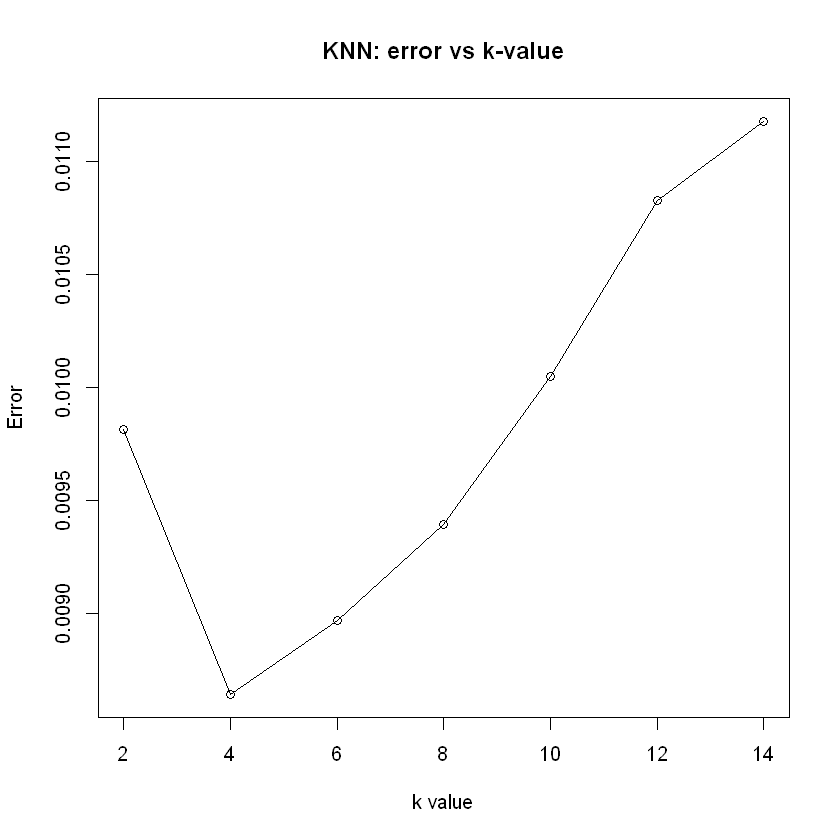

In [14]:
# plot error vs k-value
plot(k.vals, k.error,
    main="KNN: error vs k-value",
    xlab="k value",
    ylab="Error")
lines(k.vals[order(k.vals)], k.error[order(k.vals)], xlim=range(k.vals), ylim=range(k.error), pch=16)

In [15]:
cat("Optimal k-value: ", k.vals[which.min(k.error)])

Optimal k-value:  4

In [6]:
# build knn model with optimal k-value

#knn1 <- knn(train = train2, test = test2, cl = train2$PRLMISEVR, k=k.vals[which.min(k.error)])
knn1 <- knn(train = train2, test = test2, cl = train2$PRLMISEVR, k=4)

In [23]:
# get predictions, confusion matrix, and test error
confusionMatrix(knn1, test2$PRLMISEVR)

# test error
knn1.error = mean(knn1 != test2$PRLMISEVR)

# other metrics
knn.accuracy=confusionMatrix(knn1, test2$PRLMISEVR)$overall[[1]]
knn.sensitivity=confusionMatrix(knn1, test2$PRLMISEVR)$byClass[[2]]
knn.specificity=confusionMatrix(knn1, test2$PRLMISEVR)$byClass[[1]]
knn.precision=confusionMatrix(knn1, test2$PRLMISEVR)$byClass[[4]]
knn.pvalue=confusionMatrix(knn1, test2$PRLMISEVR)$overall[[7]]

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 37905   228
         1   144  4302
                                          
               Accuracy : 0.9913          
                 95% CI : (0.9903, 0.9921)
    No Information Rate : 0.8936          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9537          
                                          
 Mcnemar's Test P-Value : 1.682e-05       
                                          
            Sensitivity : 0.9962          
            Specificity : 0.9497          
         Pos Pred Value : 0.9940          
         Neg Pred Value : 0.9676          
             Prevalence : 0.8936          
         Detection Rate : 0.8902          
   Detection Prevalence : 0.8956          
      Balanced Accuracy : 0.9729          
                                          
       'Positive' Class : 0               
                  

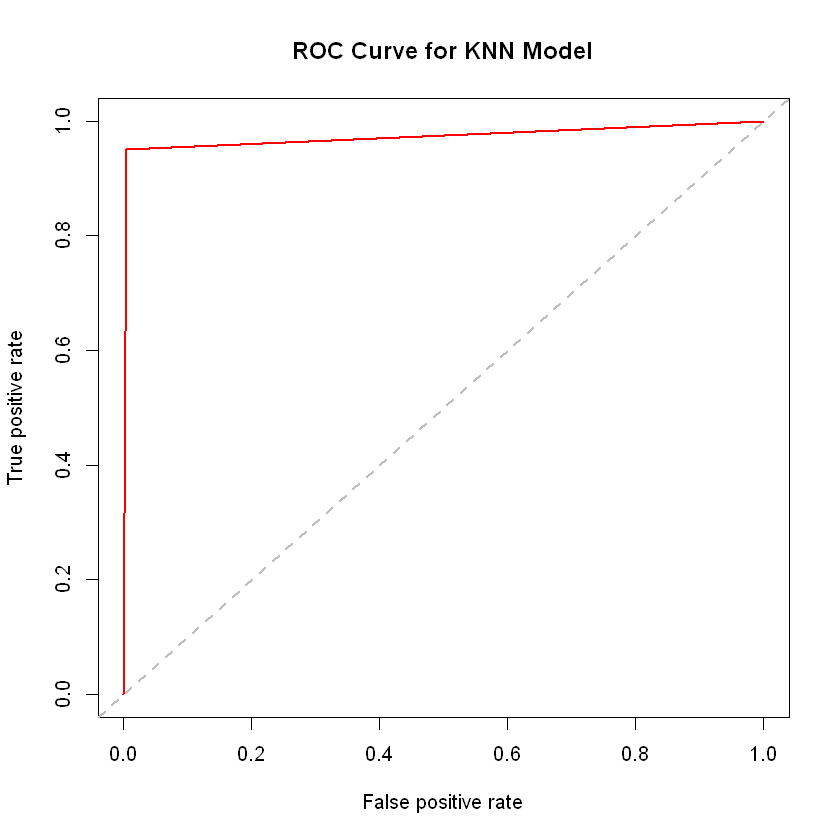

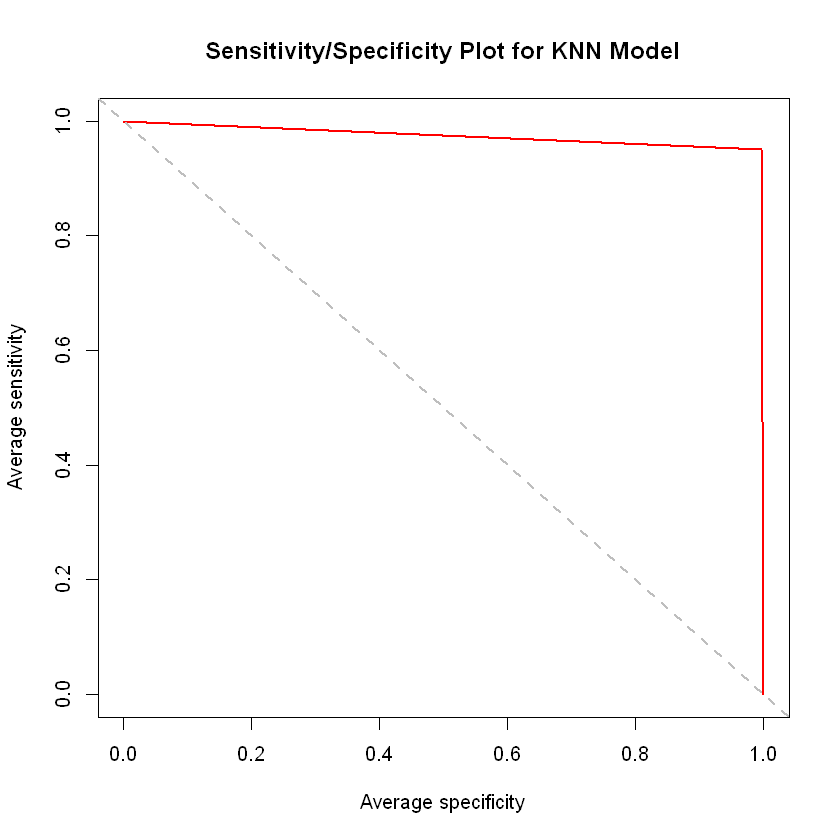

In [14]:
pred = prediction(as.numeric(as.vector(knn1)), as.numeric(test$PRLMISEVR))

# Plot ROC curve
perf = performance(pred, "tpr","fpr")
plot(perf,main="ROC Curve for KNN Model",col=2,lwd=2)
abline(a=0,b=1,lwd=2,lty=2,col="gray")

# Plot sensitivity/specificity
perf = performance(pred, "sens", "spec")
plot(perf,
     avg="threshold",
     col=2,
     lwd=2,
     main="Sensitivity/Specificity Plot for KNN Model")
abline(a=1,b=-1,lwd=2,lty=2,col="gray")

In [49]:
# Error Rate comparison
df.compare <- data.frame(Classifier=c("LDA", "QDA", "Naive Bayes", "Logistic Regression", "KNN", "Random Forest", "Boosting"),
                         Error=c(lda1.error, qda1.error, bayes1.error, glm1.error, knn1.error, 0.09403697, 0.09279222),
                         Accuracy=c(lda.accuracy, qda.accuracy, bayes.accuracy, glm.accuracy, knn.accuracy, 0.9061, 0.9072),
                         Sensitivity=c(lda.sensitivity, qda.sensitivity, bayes.sensitivity, glm.sensitivity, knn.sensitivity,
                                      0.2227373, 0.2631000),
                         Specificity=c(lda.specificity, qda.specificity, bayes.specificity, glm.specificity, knn.specificity,
                                      0.9873058, 0.9839000),
                         Precision=c(lda.precision, qda.precision, bayes.precision, glm.precision, knn.precision,
                                    0.6587, 0.6604),
                         pvalue=c(lda.pvalue, qda.pvalue, bayes.pvalue, glm.pvalue, knn.pvalue, 
                                 2.2e-16, 2.2e-16)
                     )

df.compare <- df.compare[order(df.compare$Error),]
df.compare[,-c(1,7)] <- round(df.compare[,-c(1,7)],4)
rownames(df.compare) <- df.compare$Classifier
df.compare$Classifier <- NULL
df.compare

,Error,Accuracy,Sensitivity,Specificity,Precision,pvalue
KNN,0.0087,0.9913,0.9497,0.9962,0.9676,1.682351e-05
Boosting,0.0928,0.9072,0.2631,0.9839,0.6604,2.200000e-16
Logistic Regression,0.0939,0.9061,0.2442,0.9849,0.6587,0.000000e+00
Random Forest,0.0940,0.9061,0.2227,0.9873,0.6587,2.200000e-16
LDA,0.0992,0.9008,0.3472,0.9667,0.5539,6.822641e-149
QDA,0.1345,0.8655,0.4631,0.9134,0.3891,5.363345e-30
Naive Bayes,0.1369,0.8631,0.4830,0.9084,0.3857,1.331960e-50
